# Routes between US airports

## Load flights dataset

In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

import glob

BASIC_PATH = './Data/'
ALL_FILES = BASIC_PATH + '*.csv'

def readOneFile(url):
    return pd.read_csv(url, index_col = 0)

data = readOneFile(BASIC_PATH + "flights_2010_9.csv")
flights = pd.DataFrame(data=data)
flights

,date,airline,airline_code,departure_airport,departure_state,departure_lat,departure_lon,departure_schedule,arrival_airport,arrival_state,...,arrival_schedule,departure_actual,departure_delay,arrival_actual,arrival_delay,arrival_tz,departure_tz,duration,distance,speed
9078609,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 22:15:00,ATL,GA,...,2010-01-02 00:28:00,1628,13.0,1938,10.0,-5,-6,0 days 02:13:00.000000000,1108.117037,499.902423
9078610,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 22:45:00,MSP,MN,...,2010-01-02 01:29:00,1701,16.0,1943,14.0,-6,-6,0 days 02:44:00.000000000,1667.184238,609.945453
9078611,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:10:00,PIT,PA,...,2010-01-02 02:00:00,1719,9.0,2047,-13.0,-5,-6,0 days 02:50:00.000000000,1797.837592,634.530915
9078612,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:30:00,ASE,CO,...,2010-01-02 02:15:00,1751,21.0,1927,12.0,-7,-6,0 days 02:45:00.000000000,1469.812872,534.477408
9078613,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:30:00,ELP,TX,...,2010-01-02 00:24:00,1736,6.0,1837,13.0,-6,-6,0 days 00:54:00.000000000,1071.278673,1190.309636
9078614,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:37:00,DTW,MI,...,2010-01-02 02:35:00,1809,32.0,2150,15.0,-5,-6,0 days 02:58:00.000000000,1731.188863,583.546808
9078615,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:37:00,STL,MO,...,2010-01-02 01:44:00,1737,0.0,1929,-15.0,-6,-6,0 days 02:07:00.000000000,1075.137068,507.938772
9078616,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:39:00,TUS,AZ,...,2010-01-02 01:02:00,1752,13.0,1812,10.0,-7,-6,0 days 01:23:00.000000000,1503.543102,1086.898628
9078617,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-01 23:41:00,COS,CO,...,2010-01-02 02:03:00,1820,39.0,1941,38.0,-7,-6,0 days 02:22:00.000000000,1302.104137,550.184847
9078618,2012-08-19,OO,20304,IAH,TX,29.98,-95.34,2010-01-02 00:53:00,ATL,GA,...,2010-01-02 02:59:00,1907,14.0,2204,5.0,-5,-6,0 days 02:06:00.000000000,1108.117037,527.674779


## Get flight departure and arrival airport combinations

In [2]:
edges = flights[['departure_airport', 'arrival_airport']].values
edges

array([['IAH', 'ATL'],
       ['IAH', 'MSP'],
       ['IAH', 'PIT'],
       ...,
       ['SFO', 'LAX'],
       ['SFO', 'JFK'],
       ['SFO', 'DFW']], dtype=object)

## Create graph from routes

In [3]:
g = nx.from_edgelist(edges)

In [4]:
len(g.nodes()), len(g.edges())

(288, 2069)

## Draw graph

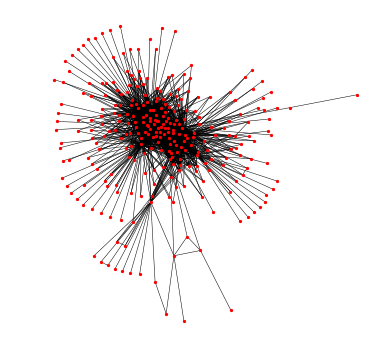

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

## Get airport positions

In [6]:
pos = {}
airports = flights[["departure_airport", "departure_lat", "departure_lon"]].drop_duplicates()
for i, row in airports.iterrows():
    airport = row["departure_airport"]
    pos[airport] = (row["departure_lon"], row["departure_lat"])

## Size and color by amount of connections

In [7]:
deg = nx.degree(g)
sizes = [5 * deg[iata] for iata in g.nodes]

## Add labels

In [8]:
labels = {iata: iata if deg[iata] >= 60 else ''
          for iata in g.nodes}

## Map with all connections

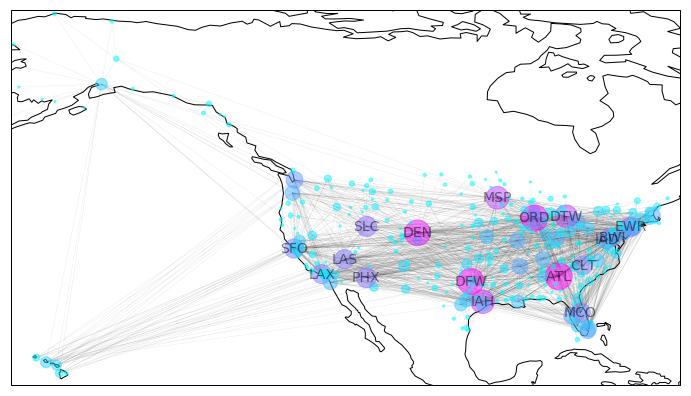

In [9]:
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))

ax.coastlines()

ax.set_extent([-163, -67, 18, 64])
nx.draw_networkx(g, ax=ax,
                 font_size=14,
                 alpha=.5,
                 width=.07,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=sizes,
                 cmap=plt.cm.cool)